## Imports

In [1]:
import os
import pandas as pd 
import seaborn as sns
import ipywidgets as widgets
import matplotlib.pyplot as plt
import ast

from IPython.display import display
from kaggle.api.kaggle_api_extended import KaggleApi


## Load Dataset 1

In [2]:
# Set your Kaggle credentials (ensure you have a kaggle.json file)
api = KaggleApi()
api.authenticate()

# Define dataset and path
dataset = "thedevastator/billboard-hot-100-audio-features"
save_path = os.getcwd()  # Current directory

# Download dataset
api.dataset_download_files(dataset, path=save_path, unzip=True)

print(f"Dataset downloaded to: {save_path}")


Dataset URL: https://www.kaggle.com/datasets/thedevastator/billboard-hot-100-audio-features
Dataset downloaded to: /Users/schif/Desktop/MA/MA4/Data Viz/project/com-480-project-Certified-Lover-Data/data_preprocessing


## Data Analysis & Processing

### Hot Stuff dataset

In [2]:
hot_stuff = pd.read_csv('Hot Stuff.csv')
hot_stuff.head(10)

,index,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,0,http://www.billboard.com/charts/hot-100/1965-0...,7/17/1965,34,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,45.0,34,4
1,1,http://www.billboard.com/charts/hot-100/1965-0...,7/24/1965,22,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,34.0,22,5
2,2,http://www.billboard.com/charts/hot-100/1965-0...,7/31/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,22.0,14,6
3,3,http://www.billboard.com/charts/hot-100/1965-0...,8/7/1965,10,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,10,7
4,4,http://www.billboard.com/charts/hot-100/1965-0...,8/14/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,10.0,8,8
5,5,http://www.billboard.com/charts/hot-100/1965-0...,8/21/1965,8,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,8.0,8,9
6,6,http://www.billboard.com/charts/hot-100/1965-0...,8/28/1965,14,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,8.0,8,10
7,7,http://www.billboard.com/charts/hot-100/1965-0...,9/4/1965,36,Don't Just Stand There,Patty Duke,Don't Just Stand TherePatty Duke,1,14.0,8,11
8,8,http://www.billboard.com/charts/hot-100/1997-0...,4/19/1997,97,Don't Keep Wasting My Time,Teddy Pendergrass,Don't Keep Wasting My TimeTeddy Pendergrass,1,NaN,97,1
9,9,http://www.billboard.com/charts/hot-100/1997-0...,4/26/1997,90,Don't Keep Wasting My Time,Teddy Pendergrass,Don't Keep Wasting My TimeTeddy Pendergrass,1,97.0,90,2


In [3]:
print("Hot stuff Dataset contains :", len(hot_stuff), "rows")

Hot stuff Dataset contains : 327895 rows


In [4]:
hot_stuff.columns

Index(['index', 'url', 'WeekID', 'Week Position', 'Song', 'Performer',
       'SongID', 'Instance', 'Previous Week Position', 'Peak Position',
       'Weeks on Chart'],
      dtype='object')

In [5]:
print(f"In Previous Week Postion {hot_stuff['Previous Week Position'].isna().sum()/len(hot_stuff['Previous Week Position']):.2%} of the data is missing")

In Previous Week Postion 9.75% of the data is missing


In [6]:
hot_stuff.describe()

,index,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
count,327895.000000,327895.000000,327895.000000,295941.000000,327895.000000,327895.000000
mean,163947.000000,50.499309,1.072538,47.604066,41.358307,9.153793
std,94655.277595,28.865707,0.334188,28.056915,29.542497,7.590281
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,81973.500000,25.500000,1.000000,23.000000,14.000000,4.000000
50%,163947.000000,50.000000,1.000000,47.000000,39.000000,7.000000
75%,245920.500000,75.000000,1.000000,72.000000,66.000000,13.000000
max,327894.000000,100.000000,10.000000,100.000000,100.000000,87.000000


In [7]:
print(f"Hot Stuff has {hot_stuff['Song'].nunique()} unique tracks")

Hot Stuff has 24360 unique tracks


### Hot 100 Audio Features

In [8]:
hot_100 = pd.read_csv('Hot 100 Audio Features.csv')
hot_100.head()

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,spotify_track_popularity
0,0,-twistin'-White Silver SandsBill Black's Combo,Bill Black's Combo,-twistin'-White Silver Sands,[],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,¿Dònde Està Santa Claus? (Where Is Santa Claus...,Augie Rios,¿Dònde Està Santa Claus? (Where Is Santa Claus?),['novelty'],NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,-14.063,1.0,0.0315,0.91100,0.000267,0.112,0.150,83.969,4.0,38.0
3,3,...And Then There Were DrumsSandy Nelson,Sandy Nelson,...And Then There Were Drums,"['rock-and-roll', 'space age pop', 'surf music']",1fHHq3qHU8wpRKHzhojZ4a,NaN,172066.0,False,Compelling Percussion,...,-17.278,0.0,0.0361,0.00256,0.745000,0.145,0.801,121.962,4.0,11.0
4,4,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,-5.745,0.0,0.0307,0.20200,0.000131,0.443,0.907,92.960,4.0,77.0


If the track just appeared on the billboard, it's normal that it doesn't have a previous week position so we'll keep this rows as is

## Drop all rows that do not have a preview url

In [9]:
hot_100.dropna(subset=['spotify_track_preview_url'], inplace=True)

## Merge the two datasets

In [10]:
billboard_100 = hot_100.merge(hot_stuff, on=['Performer', 'SongID', 'Song']).drop(columns=['index_y', 'index_x']).reset_index()
billboard_100.head(5)

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,tempo,time_signature,spotify_track_popularity,url,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart
0,0,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,83.969,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/3/1965,78,1,NaN,78,1
1,1,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,83.969,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/10/1965,61,1,78.0,61,2
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,83.969,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/17/1965,50,1,61.0,50,3
3,3,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,83.969,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/8/1965,36,1,37.0,36,6
4,4,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,83.969,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/1/1965,37,1,40.0,37,5


In [11]:
billboard_100['Year'] = billboard_100['WeekID'].apply(lambda x : int(x.split('/')[2]))
billboard_100.head(10)

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,time_signature,spotify_track_popularity,url,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,Year
0,0,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/3/1965,78,1,NaN,78,1,1965
1,1,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/10/1965,61,1,78.0,61,2,1965
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/17/1965,50,1,61.0,50,3,1965
3,3,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/8/1965,36,1,37.0,36,6,1965
4,4,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/1/1965,37,1,40.0,37,5,1965
5,5,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/24/1965,40,1,50.0,40,4,1965
6,6,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,4.0,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/15/1965,43,1,36.0,36,7,1965
7,7,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,4.0,77.0,http://www.billboard.com/charts/hot-100/1998-1...,11/21/1998,17,1,NaN,17,1,1998
8,8,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,4.0,77.0,http://www.billboard.com/charts/hot-100/1998-1...,11/28/1998,14,1,17.0,14,2,1998
9,9,...Baby One More TimeBritney Spears,Britney Spears,...Baby One More Time,"['dance pop', 'pop', 'post-teen pop']",3MjUtNVVq3C8Fn0MP3zhXa,https://p.scdn.co/mp3-preview/da2134a161f1cb34...,211066.0,False,...Baby One More Time (Digital Deluxe Version),...,4.0,77.0,http://www.billboard.com/charts/hot-100/1998-1...,12/5/1998,18,1,14.0,14,3,1998


In [12]:
billboard_100.dropna(subset=['spotify_genre', 'danceability'], inplace=True) # could have chosen any other criteria like loudness etc, but full rows were missing

In [16]:
billboard_100.columns

Index(['index', 'SongID', 'Performer', 'Song', 'spotify_genre',
       'spotify_track_id', 'spotify_track_preview_url',
       'spotify_track_duration_ms', 'spotify_track_explicit',
       'spotify_track_album', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'spotify_track_popularity', 'url',
       'WeekID', 'Week Position', 'Instance', 'Previous Week Position',
       'Peak Position', 'Weeks on Chart', 'Year', 'Month'],
      dtype='object')

In [13]:
len(billboard_100)

168420

In [14]:
from calendar import month_name

# create new Month column with full month name
billboard_100['Month'] = pd.to_datetime(billboard_100['WeekID']).dt.month.apply(lambda x: month_name[x])

# add year column
billboard_100['Year'] = pd.to_datetime(billboard_100['WeekID']).dt.year

In [15]:
billboard_100

,index,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_duration_ms,spotify_track_explicit,spotify_track_album,...,spotify_track_popularity,url,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,Year,Month
0,0,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/3/1965,78,1,NaN,78,1,1965,April
1,1,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/10/1965,61,1,78.0,61,2,1965,April
2,2,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,38.0,http://www.billboard.com/charts/hot-100/1965-0...,4/17/1965,50,1,61.0,50,3,1965,April
3,3,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/8/1965,36,1,37.0,36,6,1965,May
4,4,......And Roses And RosesAndy Williams,Andy Williams,......And Roses And Roses,"['adult standards', 'brill building pop', 'eas...",3tvqPPpXyIgKrm4PR9HCf0,https://p.scdn.co/mp3-preview/cef4883cfd1e0e53...,166106.0,False,The Essential Andy Williams,...,38.0,http://www.billboard.com/charts/hot-100/1965-0...,5/1/1965,37,1,40.0,37,5,1965,May
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169910,169910,Zunga ZengK7,K7,Zunga Zeng,['freestyle'],0XevPPcCBPovknaBw3lFvh,https://p.scdn.co/mp3-preview/8d5174aeb7d6b740...,273000.0,False,Swing Batta Swing!,...,28.0,http://www.billboard.com/charts/hot-100/1994-0...,4/9/1994,75,1,71.0,61,11,1994,April
169911,169911,Zunga ZengK7,K7,Zunga Zeng,['freestyle'],0XevPPcCBPovknaBw3lFvh,https://p.scdn.co/mp3-preview/8d5174aeb7d6b740...,273000.0,False,Swing Batta Swing!,...,28.0,http://www.billboard.com/charts/hot-100/1994-0...,4/16/1994,70,1,75.0,61,12,1994,April
169912,169912,Zunga ZengK7,K7,Zunga Zeng,['freestyle'],0XevPPcCBPovknaBw3lFvh,https://p.scdn.co/mp3-preview/8d5174aeb7d6b740...,273000.0,False,Swing Batta Swing!,...,28.0,http://www.billboard.com/charts/hot-100/1994-0...,4/23/1994,75,1,70.0,61,13,1994,April
169913,169913,Zunga ZengK7,K7,Zunga Zeng,['freestyle'],0XevPPcCBPovknaBw3lFvh,https://p.scdn.co/mp3-preview/8d5174aeb7d6b740...,273000.0,False,Swing Batta Swing!,...,28.0,http://www.billboard.com/charts/hot-100/1994-0...,4/30/1994,82,1,75.0,61,14,1994,April


## Save data with

In [17]:
# ------------------------------------------------------------
# Billboard monthly-genre ranking script  (CSV edition)
# ------------------------------------------------------------
#
# Input : billboard_100  (pandas DataFrame – one row per song-per-week)
# Output: ./monthly_chunks/billboard_<month>_<year>.csv
#
# Columns in each output file
#   Year  | Month | WeekIndex | Genre | genre_weekly_score
# ------------------------------------------------------------

from pathlib import Path
from calendar import month_name
from collections import Counter   # (just to show it’s imported somewhere)
import ast
import pandas as pd

# ------------------------------------------------------------------
# 0.  Make sure the raw frame is available
# ------------------------------------------------------------------
try:
    billboard_100
except NameError as e:                      # noqa: F821
    raise RuntimeError("Load billboard_100 before running this script") from e

# ------------------------------------------------------------------
# 1.  Define the genre map + helper
# ------------------------------------------------------------------
genre_map = {
    # --------------  your mapping dictionary  --------------------
    'novelty': 'Pop', 'idol': 'Pop', 'boy band': 'Pop', 'broadway': 'Pop',
    'classic girl group': 'Pop', 'calming instrumental': 'Easy Listening',
    'neo mellow': 'Pop', 'urban contemporary': 'R&B',
    'motown': 'R&B', 'deep motown': 'R&B', 'rare groove': 'R&B', 'new jack swing': 'R&B',
    'comic': 'Comedy', 'comedy': 'Comedy', 'parody': 'Comedy',
    'hollywood': 'Soundtrack', 'movie tunes': 'Soundtrack', 'show tunes': 'Soundtrack',
    'christmas instrumental': 'Holiday',
    'nashville sound': 'Country', 'norteno': 'Regional Mexican',
    'beach music': 'Soul', 'latin': 'Latin', 'tropical': 'Latin',
    'brooklyn drill': 'Hip Hop', 'merseybeat': 'Rock', 'british invasion': 'Rock',
    'adult standards': 'Easy Listening', 'easy listening': 'Easy Listening',
    'deep adult standards': 'Easy Listening', 'mellow gold': 'Easy Listening',
    'lounge': 'Easy Listening',
    'freestyle': 'Dance', 'disco': 'Dance', 'hi-nrg': 'Dance', 'miami bass': 'Dance',
    'quiet storm': 'R&B', 'doo-wop': 'R&B', 'vocal harmony group': 'R&B',
    'surf music': 'Rock', 'cowboy western': 'Country', 'bakersfield sound': 'Country',
    'ska': 'Ska', 'ska punk': 'Ska', 'ska revival': 'Ska',
    'traditional ska': 'Ska', 'german ska': 'Ska',
    'pop': 'Pop', 'rock': 'Rock', 'hip hop': 'Hip Hop', 'rap': 'Hip Hop',
    'r&b': 'R&B', 'edm': 'Electronic', 'electro': 'Electronic', 'house': 'Electronic',
    'dance': 'Dance', 'metal': 'Metal', 'jazz': 'Jazz', 'classical': 'Classical',
    'country': 'Country', 'folk': 'Folk', 'reggae': 'Reggae', 'trap': 'Trap',
    'blues': 'Blues', 'indie': 'Indie', 'soul': 'Soul', 'funk': 'Funk'
}

def map_to_broad_genre(genre_list, genre_map):
    """Return a list of broad genres for this song; default to ['Other']."""
    if not isinstance(genre_list, list):
        return ['Other']
    matched = []
    for g in genre_list:
        lg = g.lower()
        for key in genre_map:
            if key in lg:
                matched.append(genre_map[key])
                break
    return matched if matched else ['Other']

def safe_eval(genres: str) -> list[str]:
    """Parse the stringified Python list in spotify_genre; return [] on error."""
    try:
        return ast.literal_eval(genres)
    except (ValueError, SyntaxError):
        return []

# ------------------------------------------------------------------
# 2.  Normalise calendar columns + week index (1-5)
# ------------------------------------------------------------------
bb = billboard_100.copy()
bb["WeekStart"] = pd.to_datetime(bb["WeekID"])
bb["Year"]      = bb["WeekStart"].dt.year
bb["Month"]     = bb["WeekStart"].dt.month.apply(lambda m: month_name[m])

week_lookup = (
    bb[["Year", "Month", "WeekStart"]]
    .drop_duplicates()
    .sort_values("WeekStart")
)
week_lookup["WeekIndex"] = week_lookup.groupby(["Year", "Month"]).cumcount() + 1
week_lookup = week_lookup.query("WeekIndex <= 5")          # keep 1–5 only
bb = bb.merge(week_lookup, on=["Year", "Month", "WeekStart"], how="inner")

# ------------------------------------------------------------------
# 3.  Map Spotify genres → broad genres, explode
# ------------------------------------------------------------------
bb["BroadGenres"] = (
    bb["spotify_genre"]
    .apply(safe_eval)
    .apply(lambda lst: map_to_broad_genre(lst, genre_map))
)
bb = bb.explode("BroadGenres").rename(columns={"BroadGenres": "Genre"})

# ------------------------------------------------------------------
# 4.  Filter to broad genres that appear more than once globally
# ------------------------------------------------------------------
vc = bb["Genre"].value_counts()
keep_genres = vc[vc > 1].index
bb = bb[bb["Genre"].isin(keep_genres)]
# ------------------------------------------------------------------
# 5.  Inverse-rank weight  +  weekly genre scores  +  weekly_position
# ------------------------------------------------------------------
bb["inv_pos"] = 1 / bb["Week Position"]

weekly_scores = (
    bb
    .groupby(["Year", "Month", "WeekIndex", "Genre"], as_index=False)
    ["inv_pos"]
    .sum()
    .rename(columns={"inv_pos": "genre_weekly_score"})
)

# ── NEW: calculate rank (weekly_position) inside every week ─────────
weekly_scores["weekly_position"] = (
    weekly_scores
    .groupby(["Year", "Month", "WeekIndex"])
    ["genre_weekly_score"]
    .rank(method="dense", ascending=False)
    .astype(int)
)

# Keep the **Top-10** genres per (Year, Month, WeekIndex)
weekly_top10 = (
    weekly_scores
    .query("weekly_position <= 10")          # ← filter first
    .sort_values(
        ["Year", "Month", "WeekIndex", "weekly_position"]
    )
    .reset_index(drop=True)
)

# ------------------------------------------------------------------
# 5b.  Get top track preview URL for each (Year, Month, WeekIndex, Genre)
# ------------------------------------------------------------------
# We'll sort so that the highest-ranked song (lowest Week Position) appears first
top_tracks = (
    bb.sort_values(["Year", "Month", "WeekIndex", "Genre", "Week Position"])
      .dropna(subset=["spotify_track_preview_url"])  # remove missing previews
      .drop_duplicates(subset=["Year", "Month", "WeekIndex", "Genre"])
      .loc[:, ["Year", "Month", "WeekIndex", "Genre", "spotify_track_preview_url", "Performer", "Song", "spotify_track_id", 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature']]
)

# Merge with the weekly_top10 DataFrame
weekly_top10 = weekly_top10.merge(
    top_tracks,
    on=["Year", "Month", "WeekIndex", "Genre"],
    how="left"  # might be missing preview for some genres
)


# ------------------------------------------------------------------
# 6.  Write one CSV per <month, year>
# ------------------------------------------------------------------
out_dir = Path("../data")
out_dir.mkdir(exist_ok=True)

for (year, month), chunk in weekly_top10.groupby(["Year", "Month"]):
    file_name = f"billboard_{month.lower()}_{year}.csv"
    chunk.to_csv(out_dir / file_name, index=False)

print(f"✅  Saved {len(list(out_dir.glob('billboard_*.csv')))} CSVs in {out_dir.resolve()}")



✅  Saved 755 CSVs in /Users/schif/Desktop/MA/MA4/Data Viz/project/com-480-project-Certified-Lover-Data/data


## For personnal usage, don't push to git

In [19]:
bb.to_csv('../data/billboard_100_processed.csv', index=False)
# ------------------------------------------------------------
print("Billboard 100 processed file saved as ../data/billboard_100_processed.csv")

Billboard 100 processed file saved as ../data/billboard_100_processed.csv


## Load top songs across 73 countries

In [ ]:
dataset_path = "asaniczka/top-spotify-songs-in-73-countries-daily-updated"
save_path = os.getcwd()  # Current directory

# Download dataset
api.dataset_download_files(dataset_path, path=save_path, unzip=True)

print(f"Dataset downloaded to: {save_path}")

Dataset URL: https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated
Dataset downloaded to: /Users/schif/Desktop/MA/MA4/Data Viz/project/com-480-project-Certified-Lover-Data/milestones/M3


In [22]:
spotify_dataset = pd.read_csv('universal_top_spotify_songs.csv')
spotify_dataset.head(10)

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,7so0lgd0zP2Sbgs2d7a1SZ,Die With A Smile,"Lady Gaga, Bruno Mars",1,1,0,NaN,2025-05-11,91,False,...,6,-7.727,0,0.0317,0.2890,0.000000,0.1260,0.498,157.964,3
1,2RkZ5LkEzeHGRsmDqKwmaJ,Ordinary,Alex Warren,2,-1,0,NaN,2025-05-11,92,False,...,2,-6.141,1,0.0600,0.7040,0.000007,0.0550,0.391,168.115,3
2,6dOtVTDdiauQNBQEDOtlAB,BIRDS OF A FEATHER,Billie Eilish,3,0,0,NaN,2025-05-11,100,False,...,2,-10.171,1,0.0358,0.2000,0.060800,0.1170,0.438,104.978,4
3,4wJ5Qq0jBN4ajy7ouZIV1c,APT.,"ROSÉ, Bruno Mars",4,0,0,NaN,2025-05-11,91,False,...,0,-4.477,0,0.2600,0.0283,0.000000,0.3550,0.939,149.027,4
4,3sK8wGT43QFpWrvNQsrQya,DtMF,Bad Bunny,5,0,4,NaN,2025-05-11,97,True,...,7,-27.405,0,0.0717,0.1770,0.218000,0.0807,0.032,136.020,4
5,6iOndD4OFo7GkaDypWQIou,La Plena - W Sound 05,"W Sound, Beéle, Ovy On The Drums",6,0,-1,NaN,2025-05-11,94,True,...,5,-3.485,1,0.1320,0.5430,0.000984,0.1010,0.659,99.039,4
6,2lTm559tuIvatlT1u0JYG2,BAILE INoLVIDABLE,Bad Bunny,7,0,13,NaN,2025-05-11,96,True,...,10,-46.113,1,0.0615,0.1920,0.790000,0.1120,0.219,119.387,3
7,0fK7ie6XwGxQTIkpFoWkd1,like JENNIE,JENNIE,8,0,-1,NaN,2025-05-11,96,True,...,10,-5.321,0,0.0611,0.2810,0.006710,0.0868,0.815,130.019,4
8,3xkHsmpQCBMytMJNiDf3Ii,Beautiful Things,Benson Boone,9,0,1,NaN,2025-05-11,93,False,...,10,-5.692,1,0.0603,0.1510,0.000000,0.1400,0.219,105.029,3
9,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",10,2,-2,NaN,2025-05-11,93,False,...,2,-7.546,1,0.1250,0.2510,0.000000,0.2480,0.576,138.008,4


In [23]:
spotify_dataset.isna().sum()

spotify_id                0
name                     30
artists                  29
daily_rank                0
daily_movement            0
weekly_movement           0
country               27358
snapshot_date             0
popularity                0
is_explicit               0
duration_ms               0
album_name              822
album_release_date      659
danceability              0
energy                    0
key                       0
loudness                  0
mode                      0
speechiness               0
acousticness              0
instrumentalness          0
liveness                  0
valence                   0
tempo                     0
time_signature            0
dtype: int64

For the **country** column in the **Top Spotify Tracks per Country** dataset, missing values are problematic since this column is central to our analysis. Since our focus is on track popularity across different countries, we will **remove all rows where the country value is missing** to ensure the dataset remains relevant and accurately represents regional trends in music consumption.

### Since we need the country info, we'll drop all rows that have nan countries

In [26]:
print(f'Number of rows before dropping Nan in Country column : {len(spotify_dataset)}')
spotify_dataset.dropna(subset=['country'], inplace=True)
print(f'Number of rows after dropping Nan in Country column : {len(spotify_dataset)}')


Number of rows before dropping Nan in Country column : 1998719
Number of rows after dropping Nan in Country column : 1971361


Shifting to this dataset, which tracks **Spotify's top songs across multiple countries**, this plot highlights the **top 10 songs with the widest global reach**. It shows which tracks are charting in the most countries, offering insight into the most internationally popular songs.

### Merge on spotify ID

In [ ]:
merged = pd.merge(top_50_spotify, billboard_100_exploded, left_on='spotify_id', right_on='spotify_track_id', how='inner')


In [110]:
merged

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,time_signature_y,spotify_track_popularity,url,WeekID,Week Position,Instance,Previous Week Position,Peak Position,Weeks on Chart,Year
0,6Qyc6fS4DsZjB2mRW9DsQs,Iris,The Goo Goo Dolls,38,3,2,NaN,2025-03-13,88,False,...,3.0,78.0,http://www.billboard.com/charts/hot-100/1998-1...,12/5/1998,9,1,NaN,9,1,1998
1,6Qyc6fS4DsZjB2mRW9DsQs,Iris,The Goo Goo Dolls,38,3,2,NaN,2025-03-13,88,False,...,3.0,78.0,http://www.billboard.com/charts/hot-100/1998-1...,12/5/1998,9,1,NaN,9,1,1998
2,6Qyc6fS4DsZjB2mRW9DsQs,Iris,The Goo Goo Dolls,38,3,2,NaN,2025-03-13,88,False,...,3.0,78.0,http://www.billboard.com/charts/hot-100/1998-1...,12/5/1998,9,1,NaN,9,1,1998
3,6Qyc6fS4DsZjB2mRW9DsQs,Iris,The Goo Goo Dolls,38,3,2,NaN,2025-03-13,88,False,...,3.0,78.0,http://www.billboard.com/charts/hot-100/1998-1...,12/5/1998,9,1,NaN,9,1,1998
4,6Qyc6fS4DsZjB2mRW9DsQs,Iris,The Goo Goo Dolls,38,3,2,NaN,2025-03-13,88,False,...,3.0,78.0,http://www.billboard.com/charts/hot-100/1998-1...,12/5/1998,9,1,NaN,9,1,1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3307954,1f2V8U1BiWaC9aJWmpOARe,By the Way,Red Hot Chili Peppers,50,0,0,CR,2023-11-02,78,False,...,4.0,75.0,http://www.billboard.com/charts/hot-100/2002-1...,10/19/2002,76,1,59.0,34,19,2002
3307955,1f2V8U1BiWaC9aJWmpOARe,By the Way,Red Hot Chili Peppers,50,0,0,CR,2023-11-02,78,False,...,4.0,75.0,http://www.billboard.com/charts/hot-100/2002-1...,10/19/2002,76,1,59.0,34,19,2002
3307956,1f2V8U1BiWaC9aJWmpOARe,By the Way,Red Hot Chili Peppers,50,0,0,CR,2023-11-02,78,False,...,4.0,75.0,http://www.billboard.com/charts/hot-100/2002-1...,10/19/2002,76,1,59.0,34,19,2002
3307957,1f2V8U1BiWaC9aJWmpOARe,By the Way,Red Hot Chili Peppers,50,0,0,CR,2023-11-02,78,False,...,4.0,75.0,http://www.billboard.com/charts/hot-100/2002-1...,10/19/2002,76,1,59.0,34,19,2002


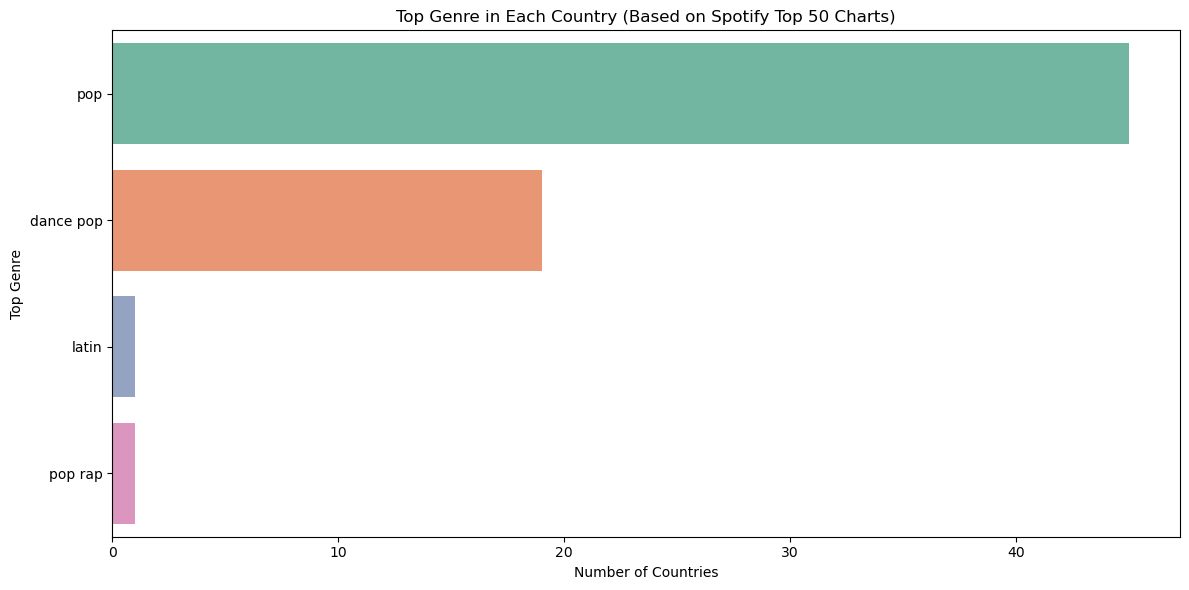

In [113]:
merged_country = merged[merged['country'].notna()].copy()

# simplify genre: take only the first genre (e.g., "pop, dance pop" -> "pop")
merged_country['main_genre'] = merged_country['spotify_genre'].str.split(',').str[0].str.strip()

# get top genre per country by count
top_genres_per_country = (
    merged_country.groupby(['country', 'main_genre'])
    .size()
    .reset_index(name='count')
    .sort_values(['country', 'count'], ascending=[True, False])
)

# pick the top genre per country
top_genres_per_country = top_genres_per_country.groupby('country').first().reset_index()

plt.figure(figsize=(12, 6))
sns.countplot(data=top_genres_per_country, y='main_genre', order=top_genres_per_country['main_genre'].value_counts().index, palette='Set2')
plt.title('Top Genre in Each Country (Based on Spotify Top 50 Charts)')
plt.xlabel('Number of Countries')
plt.ylabel('Top Genre')
plt.tight_layout()
plt.show()


Building on this, we now examine the **most dominant genre in each country** based on **Spotify’s Top 50 charts**. This visualization highlights how **pop and dance pop overwhelmingly lead** across multiple countries, while Latin and pop rap appear in a few regions, reflecting regional preferences in global music consumption.